## **Calling and filtering the data used**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/Data SWARM 2018-2020.csv') # The data is uploaded to the drive
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data[(data['F'] > 0) & (data['Bubble_Index'] >= 0)]
parameter_hapus = ['B_NEC']
data = data.drop(columns=[col for col in parameter_hapus if col in data.columns], axis=1)
data.shape

(5288005, 12)

In [ ]:
data.head()

,Timestamp,F,Bubble_Index,F107,Ne,Latitude,Longitude,Radius,Bubble_Probability,MLT,Kp,Spacecraft
0,2018-01-01 00:52:40,21410.7967,0,70.374281,116832.2,-44.900695,-18.026285,6823903.43,0.0,22.563309,2.0,A
1,2018-01-01 00:52:50,21324.1440,0,70.374096,112810.6,-44.260845,-18.009657,6823865.98,0.0,22.576477,2.0,A
2,2018-01-01 00:53:00,21245.0320,0,70.373911,111236.9,-43.620949,-17.994286,6823827.71,0.0,22.589655,2.0,A
3,2018-01-01 00:53:10,21173.2711,0,70.373726,113117.9,-42.981007,-17.980118,6823788.62,0.0,22.602848,2.0,A
4,2018-01-01 00:53:20,21108.6157,0,70.373541,111329.6,-42.341021,-17.967102,6823748.71,0.0,22.616068,2.0,A


## **Missing values**

In [ ]:
data.isnull().sum()

,0
Timestamp,0
F,0
Bubble_Index,0
F107,54887
Ne,6975
Latitude,0
Longitude,0
Radius,0
Bubble_Probability,159
MLT,0


In [ ]:
# Missing value percentage
missing_percentage = data.isnull().sum() / data.shape[0] * 100
missing_percentage

,0
Timestamp,0.000000
F,0.000000
Bubble_Index,0.000000
F107,1.037953
Ne,0.131902
Latitude,0.000000
Longitude,0.000000
Radius,0.000000
Bubble_Probability,0.003007
MLT,0.000000


## **Handling missing data**

In [ ]:
data = data.set_index('Timestamp')

In [ ]:
# Filling missing data using the interpolation method
data['F107'] = data['F107'].interpolate(method='time')
data['Ne'] = data['Ne'].interpolate(method='time')
data['Bubble_Probability'] = data['Bubble_Probability'].interpolate(method='time')

In [ ]:
data.isnull().sum()

,0
F,0
Bubble_Index,0
F107,0
Ne,0
Latitude,0
Longitude,0
Radius,0
Bubble_Probability,0
MLT,0
Kp,0


In [ ]:
data = data.reset_index()
display(data.head())

,Timestamp,F,Bubble_Index,F107,Ne,Latitude,Longitude,Radius,Bubble_Probability,MLT,Kp,Spacecraft
0,2018-01-01 00:52:40,21410.7967,0,70.374281,116832.2,-44.900695,-18.026285,6823903.43,0.0,22.563309,2.0,A
1,2018-01-01 00:52:50,21324.1440,0,70.374096,112810.6,-44.260845,-18.009657,6823865.98,0.0,22.576477,2.0,A
2,2018-01-01 00:53:00,21245.0320,0,70.373911,111236.9,-43.620949,-17.994286,6823827.71,0.0,22.589655,2.0,A
3,2018-01-01 00:53:10,21173.2711,0,70.373726,113117.9,-42.981007,-17.980118,6823788.62,0.0,22.602848,2.0,A
4,2018-01-01 00:53:20,21108.6157,0,70.373541,111329.6,-42.341021,-17.967102,6823748.71,0.0,22.616068,2.0,A


In [ ]:
data.head()

,Timestamp,F,Bubble_Index,F107,Ne,Latitude,Longitude,Radius,Bubble_Probability,MLT,Kp,Spacecraft
0,2018-01-01 00:52:40,21410.7967,0,70.374281,116832.2,-44.900695,-18.026285,6823903.43,0.0,22.563309,2.0,A
1,2018-01-01 00:52:50,21324.1440,0,70.374096,112810.6,-44.260845,-18.009657,6823865.98,0.0,22.576477,2.0,A
2,2018-01-01 00:53:00,21245.0320,0,70.373911,111236.9,-43.620949,-17.994286,6823827.71,0.0,22.589655,2.0,A
3,2018-01-01 00:53:10,21173.2711,0,70.373726,113117.9,-42.981007,-17.980118,6823788.62,0.0,22.602848,2.0,A
4,2018-01-01 00:53:20,21108.6157,0,70.373541,111329.6,-42.341021,-17.967102,6823748.71,0.0,22.616068,2.0,A


## **Exploration of the dataset**

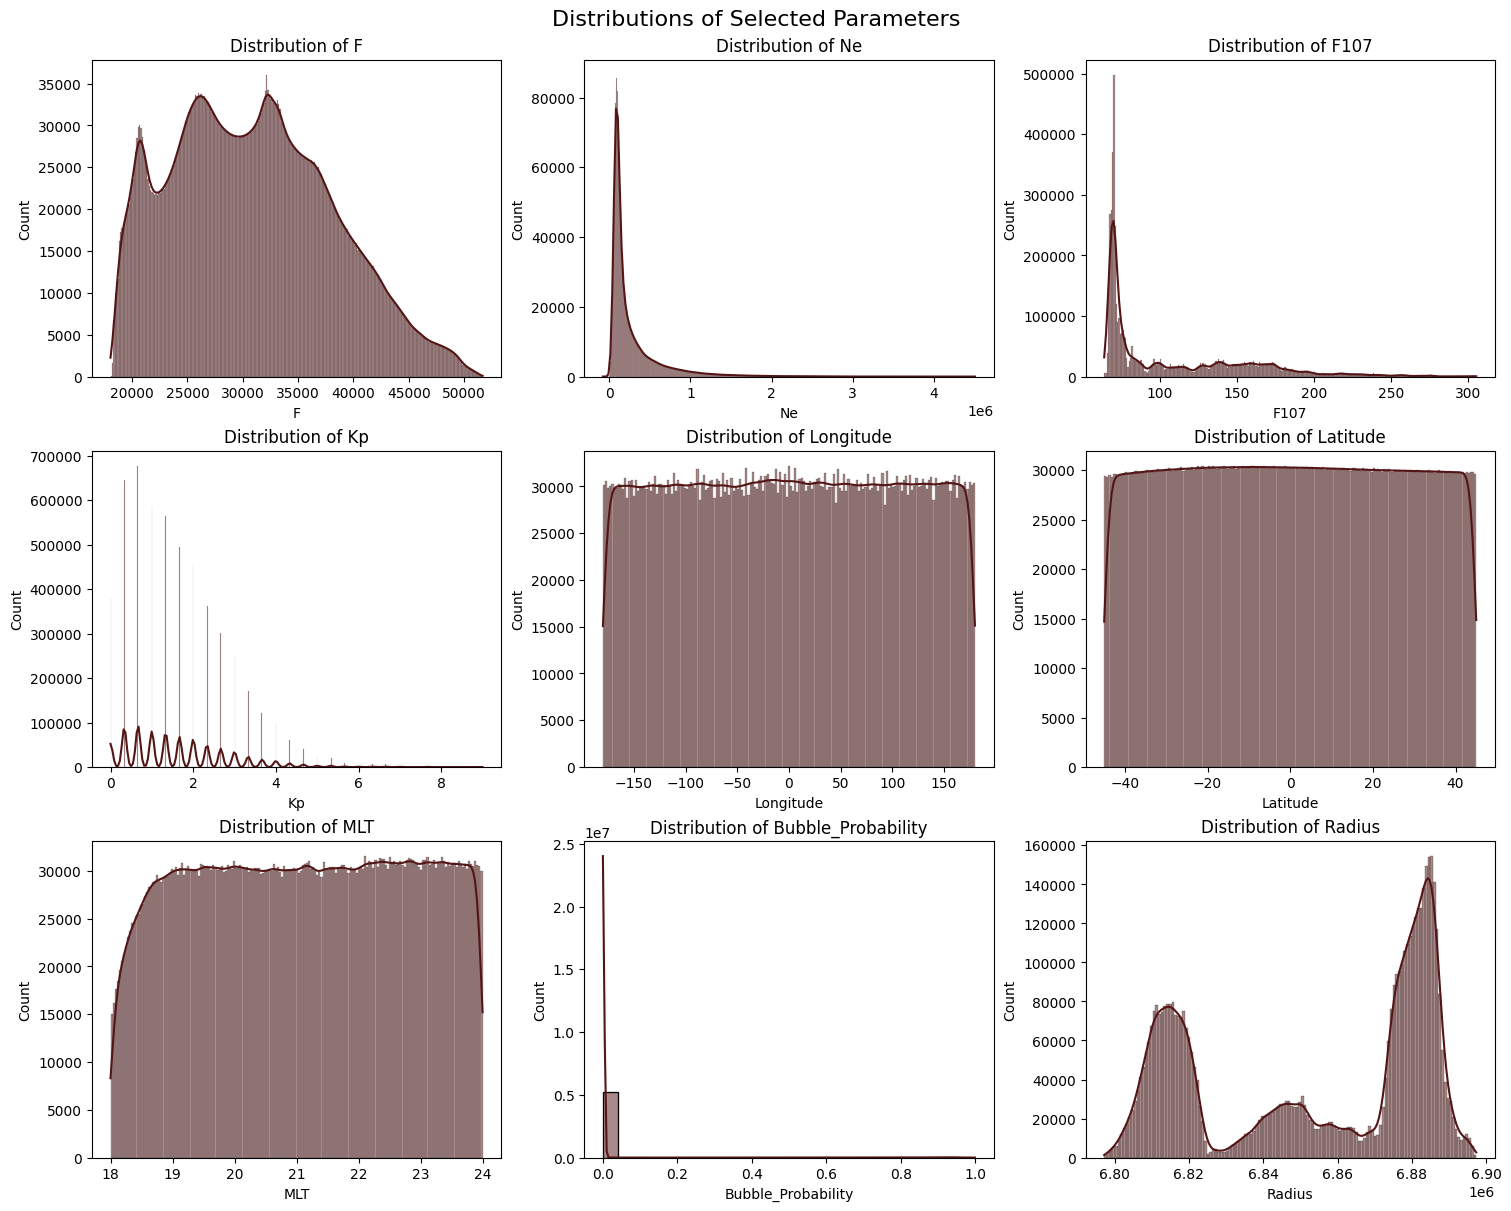

In [ ]:
# Parameter Distribution
parameters = ['F', 'Ne', 'F107', 'Kp', 'Longitude','Latitude', 'MLT','Bubble_Probability','Radius']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12), layout="constrained")
axs = axs.flatten()

for i, param in enumerate(parameters):
    sns.histplot(data[param], ax=axs[i], kde=True,color = '#541515')
    axs[i].set_title(f'Distribution of {param}')
    axs[i].set_xlabel(param)
    axs[i].set_ylabel('Count')

fig.suptitle('Distributions of Selected Parameters', fontsize=16)
plt.show()

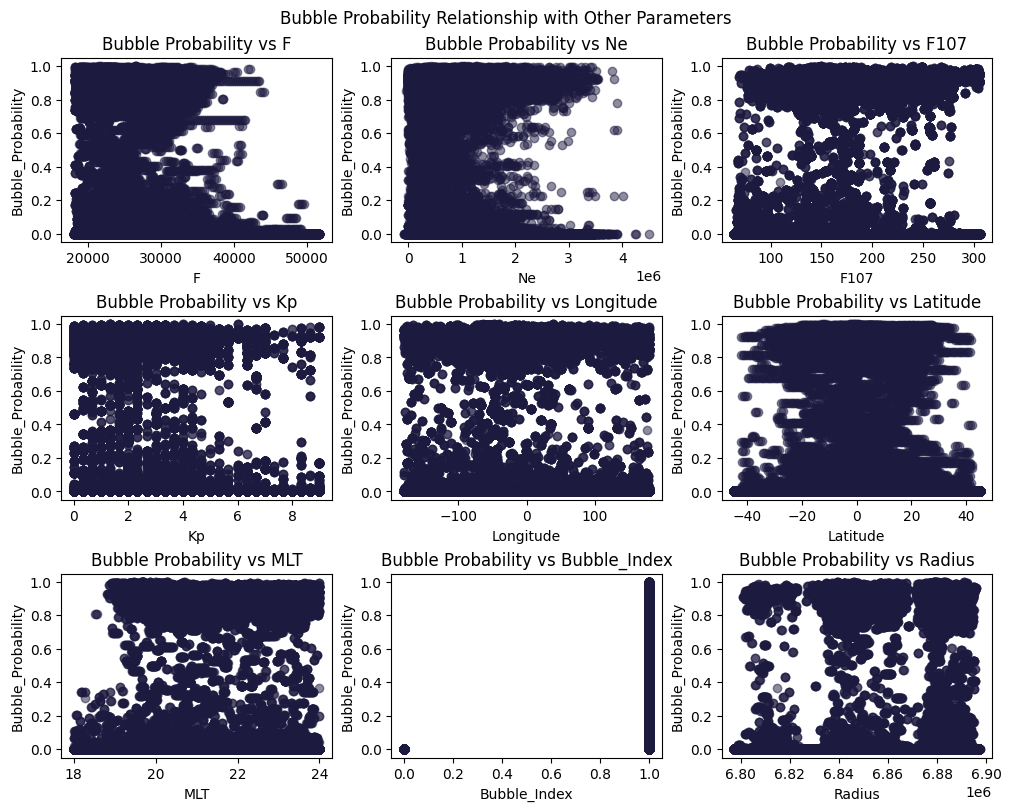

In [ ]:
# Bubble Probability Relationship with Other Parameters
parameter = ['F', 'Ne', 'F107', 'Kp', 'Longitude','Latitude', 'MLT','Bubble_Index','Radius']
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 8),
                        layout="constrained")
axs = axs.flatten()
for i, param in enumerate(parameter):
    axs[i].scatter(data[param], data['Bubble_Probability'], alpha=0.5, color='#1d1a40')
    axs[i].set_title(f'Bubble Probability vs {param}')
    axs[i].set_xlabel(param)
    axs[i].set_ylabel('Bubble_Probability')

fig.suptitle('Bubble Probability Relationship with Other Parameters')
plt.show()

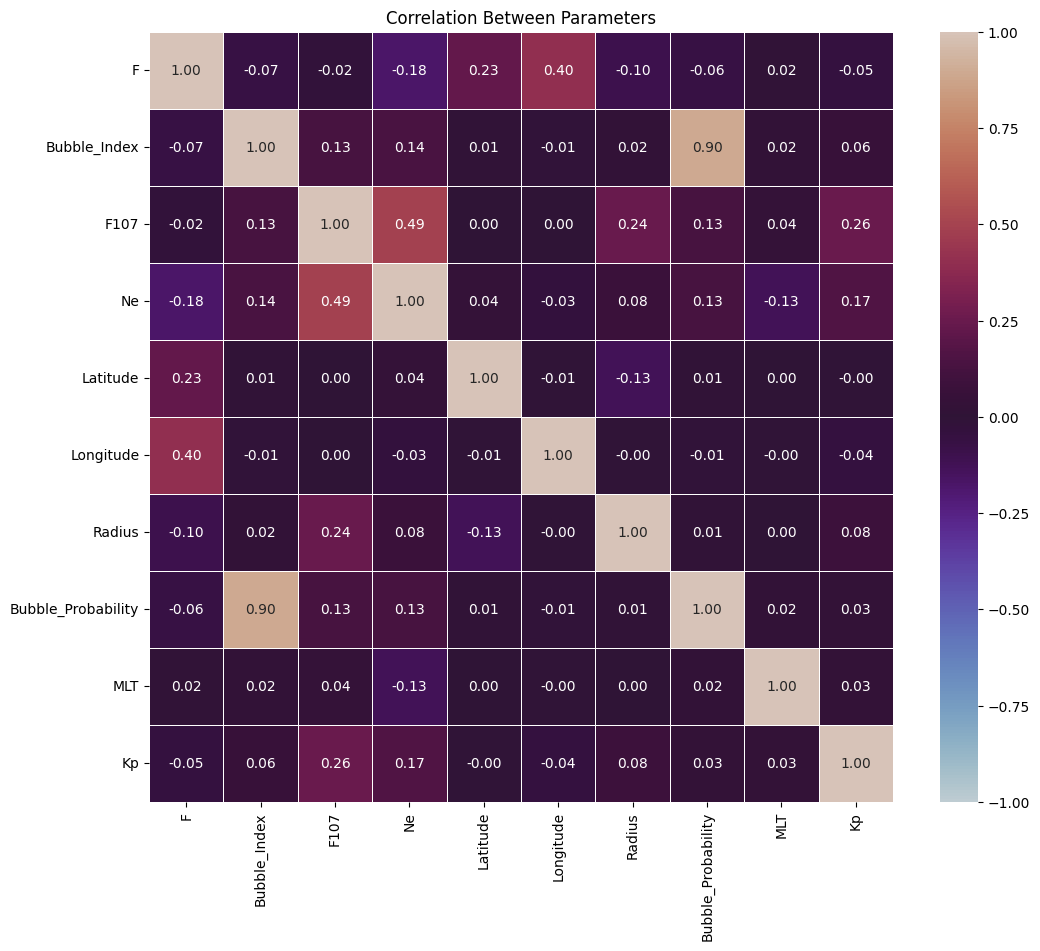

In [ ]:
# Heatmaps of Parameters
from matplotlib.pyplot import get_cmap
from matplotlib.colors import ListedColormap
grafik_heatmap = data.select_dtypes(include=np.number).columns
korelasi_data = data[grafik_heatmap].corr()

color = get_cmap('twilight')
color_cmap = ListedColormap(color(np.linspace(0.07, 0.93, 256)))

plt.figure(figsize=(12, 10))
sns.heatmap(korelasi_data, annot=True, cmap= color_cmap, fmt=".2f", vmin = -1, vmax = 1, linewidths = 0.5)
plt.title('Correlation Between Parameters')
plt.show()